In [1]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import pickle 
# import the necessary packages
from imutils import paths
import imutils



In [5]:
labelsPath = "/home/harshita/coco.names"
labels = open(labelsPath).read().strip().split("\n")
weightsPath = "/home/harshita/yolov3.weights"
configPath = "/home/harshita/yolov3.cfg"


YOLO = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = YOLO.getLayerNames()
ln = [ln[i[0] - 1] for i in YOLO.getUnconnectedOutLayers()]

In [6]:
ctr = 0

VOC = {}
for i in labels:
    if(i == 'bottle'):
        VOC[i]=(20,30);
    elif(i == 'chair'): 
        VOC[i]=(35,45);
    elif(i == 'sofa'): 
        VOC[i]=(50,55);
    elif(i == 'diningtable'): 
        VOC[i]=(50,75);
    elif(i == 'bed'): 
        VOC[i]=(65,90);
    else:
        VOC[i]=(0);
 


In [7]:
with open ('/home/harshita/ann_labels.bin','wb') as file:
    pickle.dump(VOC,file)

In [8]:
with open('/home/harshita/ann_labels.bin','rb') as file:
    data = pickle.load(file)
    print(data)

{'person': 0, 'bicycle': 0, 'car': 0, 'motorbike': 0, 'aeroplane': 0, 'bus': 0, 'train': 0, 'truck': 0, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': (20, 30), 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': (35, 45), 'sofa': (50, 55), 'pottedplant': 0, 'bed': (65, 90), 'diningtable': (50, 75), 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'to

In [9]:
p1 = '/home/harshita/Downloads/1.jpeg'
im1 = cv2.imread(p1)
p2 = '/home/harshita/Downloads/2.jpeg'
im2 = cv2.imread(p2)
p3 = '/home/harshita/Downloads/3.jpeg'
im3 = cv2.imread(p3)

# path = '/home/harshita/Downloads/w1.jpeg'
# image = cv2.imread(path)
# plt.imshow(image)

In [10]:
images = []
images.append(im1)
images.append(im2)
images.append(im3)

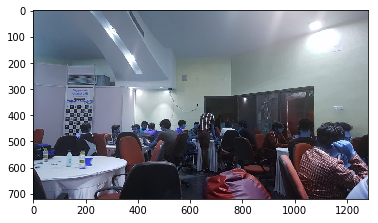

In [11]:
plt.imshow(im1)


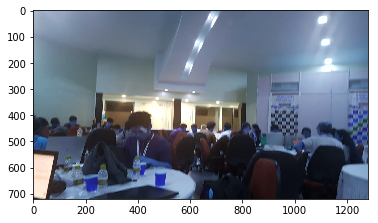

In [12]:
plt.imshow(im2)


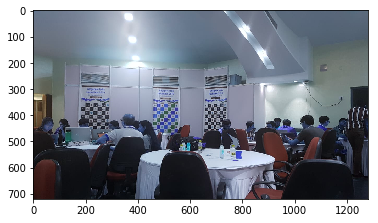

In [13]:
plt.imshow(im3)

chair 37
bottle 21
chair 44
diningtable 70
chair 37
bottle 26
chair 42
chair 41
chair 35
chair 37


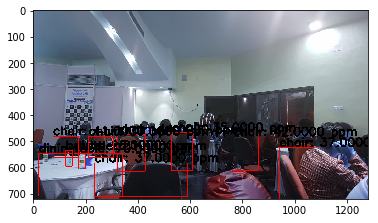

In [14]:
path = '/home/harshita/Downloads/1.jpeg'
image = cv2.imread(path)
plt.imshow(image)

blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB = True, crop = False)
YOLO.setInput(blob) 
layerOutputs = YOLO.forward(ln)
(h, w) = image.shape[:2]
boxes=[]
confidences=[]
classIDs=[]
for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.6 and (labels[classID]== 'bottle' or labels[classID]== 'chair' or labels[classID]== 'sofa' or labels[classID]== 'diningtable' or labels[classID]== 'bed'):
                #num += 1
                box = detection[0:4]*np.array([w,h,w,h])
                (cX, cY, width, height) = box.astype("int")
                x = int(cX - (width/2))
                y = int(cY - (height/2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
if len(idxs) > 0:
    for i in idxs.flatten():
        if confidences[i] > 0.4 :
                (x,y) = (boxes[i][0], boxes[i][1])
                (w,h) = (boxes[i][2], boxes[i][3])
                cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
                key = labels[classIDs[i]]
                l = random.randint(VOC[key][0],VOC[key][1])
                text = "{}: {:.4f} ppm".format(labels[classIDs[i]],l)
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,0), 5)
                print(labels[classIDs[i]],l)
                

                
                
plt.imshow(image)    

In [15]:
print("[INFO] stitching images...")
stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

# if the status is '0', then OpenCV successfully performed image
# stitching
if status == 0:
    # write the output stitched image to disk 
    #cv2.imwrite('/home/harshita/Downloads/stiched.jpeg', stitched)
    # display the output stitched image to our screen
    cv2.imshow("Stitched", stitched)
    print(status)
 
# otherwise the stitching failed, likely due to not enough keypoints)
# being detected
else:
    print("[INFO] image stitching failed ({})".format(status))

[INFO] stitching images...
0


chair 37
chair 39
chair 42
chair 35
chair 35
chair 36


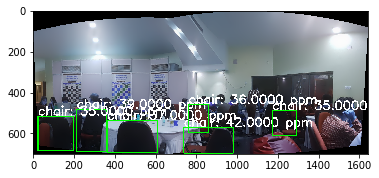

In [16]:
image = stitched 

blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB = True, crop = False)
YOLO.setInput(blob) 
layerOutputs = YOLO.forward(ln)
(h, w) = image.shape[:2]
boxes=[]
confidences=[]
classIDs=[]
for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            
            if confidence > 0.6 and (labels[classID]== 'bottle' or labels[classID]== 'chair' or labels[classID]== 'sofa' or labels[classID]== 'diningtable' or labels[classID]== 'bed'):
                #num += 1
                box = detection[0:4]*np.array([w,h,w,h])
                (cX, cY, width, height) = box.astype("int")
                x = int(cX - (width/2))
                y = int(cY - (height/2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
if len(idxs) > 0:
    for i in idxs.flatten():
        if confidences[i] > 0.4 :
                (x,y) = (boxes[i][0], boxes[i][1])
                (w,h) = (boxes[i][2], boxes[i][3])
                cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 4)
                key = labels[classIDs[i]]
                l = random.randint(VOC[key][0],VOC[key][1])
                text = "{}: {:.4f} ppm".format(labels[classIDs[i]],l)
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255,255,255), 5)
                print(labels[classIDs[i]],l)
                

                
                
plt.imshow(image)                
                

In [ ]:
confidences 

In [ ]:
image = cv2.resize(image,(1024,1024))
plt.imshow(image)

In [ ]:
boxes 

In [ ]:
print(classIDs)

In [ ]:
for i in classIDs:
    print(labels[i])